In [1]:
%matplotlib notebook
from fits_mask_tools import MaskPainter, BinnedFitsViewer
import matplotlib.pyplot as plt
import numpy as np
import h5py

Load the Saved State
Restore the configuration and image saved at the end of Day 1.

<IPython.core.display.Javascript object>


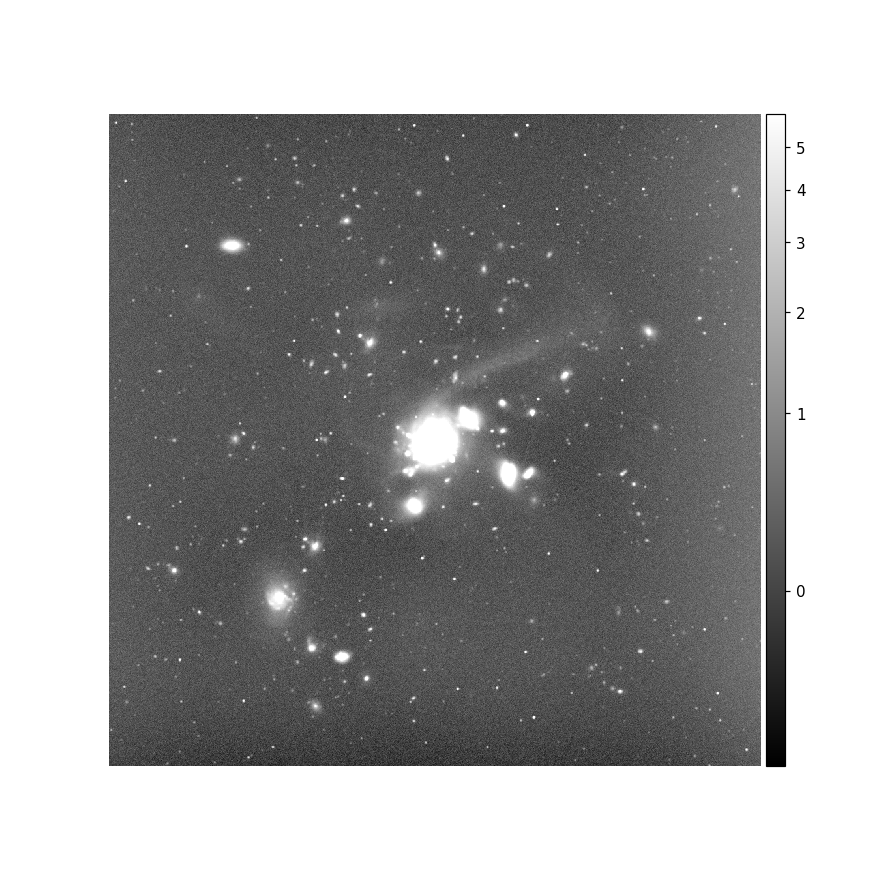

interactive(children=(Dropdown(description='stretch', index=3, options=('linear', 'log', 'sqrt', 'asinh'), val…

IntSlider(value=1, description='Binning', max=20, min=1)

In [17]:
rebinned_fv = BinnedFitsViewer.load_state()

<IPython.core.display.Javascript object>


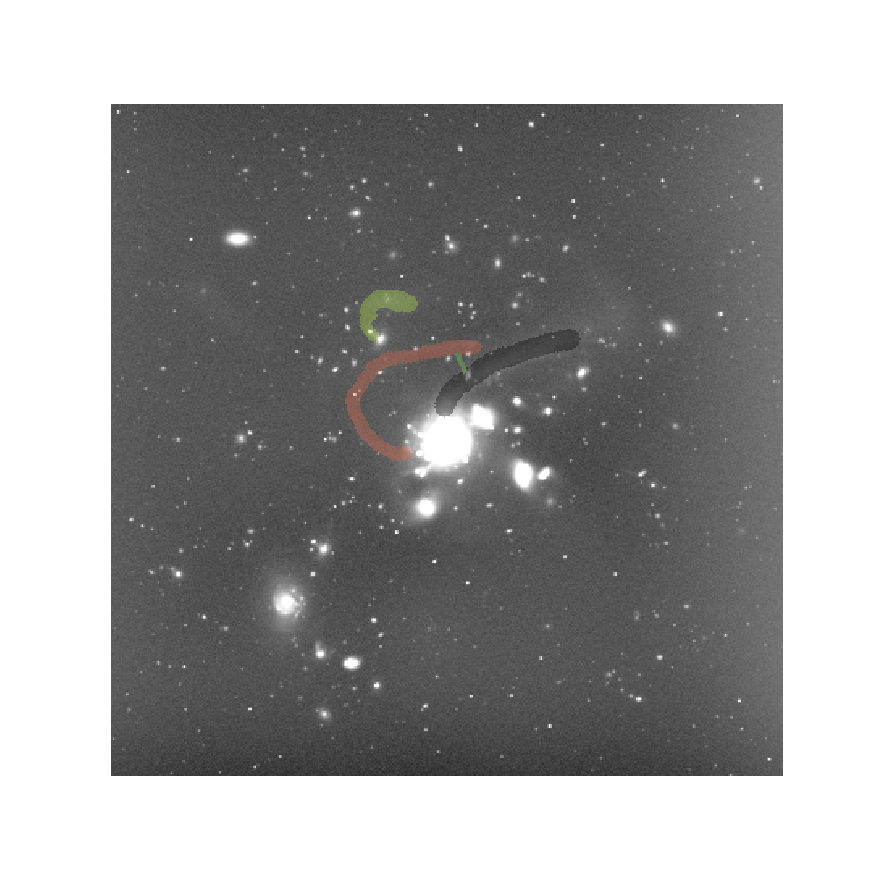

MaskPainter ready — click to create a zoom crop, paint, then commit.
Zoomed to size=390 centred on (155, 213).
No masks to save.
Returned to full image (local mask discarded).
Zoomed to size=380 centred on (214, 238).
Zoomed to size=370 centred on (214, 238).
Zoomed to size=360 centred on (214, 238).
Zoomed to size=350 centred on (214, 238).
Zoomed to size=340 centred on (214, 238).
Committed mask #1.
Committed mask #2.
Zoomed to size=210 centred on (214, 238).
Zoomed to size=190 centred on (214, 238).
Committed mask #3.
Committed mask #4.
Returned to full image (local mask discarded).
Saved 4 masks with associated cutouts to ./masks/masks_data.hdf5


In [13]:
painter = MaskPainter(rebinned_fv)

<IPython.core.display.Javascript object>


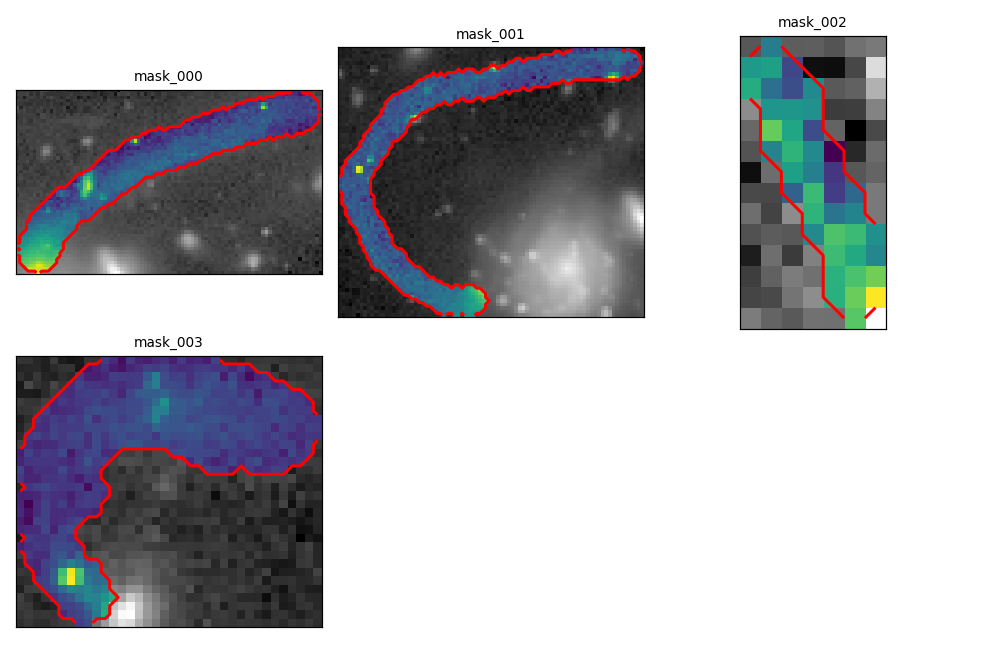

In [18]:
dict_masks = MaskPainter.plot_saved_masks('./masks/masks_data.hdf5')

In [19]:
FLUXMAG0 = 63095734448.0194 # counts to magnitudes
IMAGE_SCALE = 0.2 * rebinned_fv.bin_slider.value # arcsec

print("Mask summary:")
print("-" * 40)
for mask_name, info in dict_masks.items():

    img_masked = info['masked_data']
    
    total_counts = np.ma.sum(img_masked)
    area_pixels = np.count_nonzero(img_masked.mask)
    
    print(f"{mask_name}:")
    print(f"  Area (pixels): {area_pixels}")
    print(f"  Total counts: {total_counts:.3e}")
    print("-" * 40)

Mask summary:
----------------------------------------
mask_000:
  Area (pixels): 3737
  Total counts: 9.042e+02
----------------------------------------
mask_001:
  Area (pixels): 5159
  Total counts: 4.275e+02
----------------------------------------
mask_002:
  Area (pixels): 56
  Total counts: 1.259e+01
----------------------------------------
mask_003:
  Area (pixels): 624
  Total counts: 2.353e+02
----------------------------------------


In [ ]:
-2.5 * np.log10(total_counts/FLUXMAG0) + 2.5 * np.log10(area_pixels / IMAGE_SCALE**2)

In [ ]:
# Constants (example values, replace with your own)
FLUXMAG0 = FLUXMAG0     # Zero-point in Jy
IMAGE_SCALE = 0.2 *      # arcsec/pixel

# Assume masked_info is the dictionary returned by plot_saved_masks
# Loop over each saved mask
for mask_name, info in dict_masks.items():
    masked_data = info['masked_data']          # masked array of the cutout
    mask = ~masked_data.mask                    # boolean array: True where the mask is applied
    
    # 1. Compute total flux in the masked region
    total_flux = np.sum(masked_data.data[mask])   # sum of pixel fluxes in masked region
    
    # 2. Compute the area in pixels
    area_pix = np.count_nonzero(mask)
    
    # 3. Convert pixel area to arcsec^2
    area_arcsec2 = area_pix * IMAGE_SCALE**2
    
    print(total_flux)
    
    # 4. Compute surface brightness (mag/arcsec^2)
    # Surface brightness formula: mu = -2.5 * log10(flux / area) + ZP
    # Here we assume FLUXMAG0 is the zero-point corresponding to 0 mag
    surface_brightness = -2.5 * np.log10(total_flux/FLUXMAG0) + 2.5*np.log10(area_arcsec2)
    
    # Output
    print(f"{mask_name}:")
    print(f"  Total flux (pixels sum): {total_flux:.3e}")
    print(f"  Area (pixels): {area_pix}")
    print(f"  Area (arcsec^2): {area_arcsec2:.3f}")
    print(f"  Surface brightness (mag/arcsec^2): {surface_brightness:.2f}")
    print("-"*40)